In [141]:
# Loading required libraries

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [142]:
# Scrapping the Web Page

title = []
rating = []
price = []
features = []

for i in range(1, 21):
    URL = 'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_2kHMtA'}):

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)
        
        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [143]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))

480
480
480
480


## Create a dataframe and save it as CSV file

In [144]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})
df.head()

,Product,Rating,MRP,Feature
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....


In [145]:
df.shape

(480, 4)

In [146]:
df.tail()

,Product,Rating,MRP,Feature
475,"Tecno Pop 5 LTE (Turquoise Cyan, 32 GB)",4.2,"₹6,683",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...
476,"SAMSUNG M53 5G (Emerald Brown, 128 GB)",4.6,"₹25,900",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...
477,"vivo V25 Pro 5G (Pure Black, 128 GB)",4.4,"₹35,999",8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...
478,"vivo V25 Pro 5G (Pure Black, 256 GB)",4.4,"₹39,999",12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...
479,"OPPO F19 Pro (Crystal Silver, 256 GB)",4.3,"₹18,990",8 GB RAM | 256 GB ROM | Expandable Upto 256 GB...


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  480 non-null    object
 1   Rating   475 non-null    object
 2   MRP      480 non-null    object
 3   Feature  480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


In [148]:
# Missing Values

df.isnull().sum()

Product    0
Rating     5
MRP        0
Feature    0
dtype: int64

In [149]:
df.to_csv('Mobiles_Details.csv', index = False)

In [150]:
df.to_csv('temp.csv')

## Extracting the Details using Regex

In [151]:

import numpy as np
import pandas as pd

import re


In [152]:
df = pd.read_csv("Mobiles_Details.csv")

df.head()

,Product,Rating,MRP,Feature
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....


In [153]:
print(df['Feature'][0])
print(df['Feature'][2])
print(df['Feature'][6])

4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 5MP + 2MP | 8MP Front Camera6000 mAh Lithium Ion BatteryExynos 850 Processor1 Year Warranty Provided By the Manufacturer from Date of Purchase
128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD Display12MP + 12MP | 12MP Front CameraA13 Bionic Chip ProcessorBrand Warranty of 1 Year
3 GB RAM | 32 GB ROM | Expandable Upto 512 GB16.59 cm (6.53 inch) HD+ Display13MP + 2MP + 2MP | 5MP Front Camera5000 mAh Lithium-ion Polymer BatteryMediaTek Helio G35 Processor1 Year Warranty for Handset, 6 Months for Accessories


In [154]:
sq = lambda x : x**2
print(sq(4))

16


In [155]:
df.head()

,Product,Rating,MRP,Feature
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....


In [156]:
# RAM Information
regex = r'\d+\s(?:GB|MB)[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, str(x)))
df.head()

,Product,Rating,MRP,Feature,RAM
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM]
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM]
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,[]
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,[32 MB RAM]
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM]


In [157]:
# R0M Information
regex = r'\d+\s(?:GB|MB)[\s\w]+ROM'

df['ROM'] = df['Feature'].apply(lambda x : re.findall(regex, str(x)))
df.head()

,Product,Rating,MRP,Feature,RAM,ROM
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM]
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM]
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,[],[128 GB ROM]
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,[32 MB RAM],[32 MB ROM]
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM]


In [158]:
#Expandable upto
regex= r'Expandable Upto+\s+\d+\s(?:TB|GB)'
df['Expandable'] = df['Feature'].apply(lambda x : re.findall(regex, str(x)))
df.head()

,Product,Rating,MRP,Feature,RAM,ROM,Expandable
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB]
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB]
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,[],[128 GB ROM],[]
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,[32 MB RAM],[32 MB ROM],[]
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB]


4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 5MP + 2MP | 8MP Front Camera6000 mAh Lithium Ion BatteryExynos 850 Processor1 Year Warranty Provided By the Manufacturer from Date of Purchase


In [159]:
# camera
regex= r'\d+MP'
df['Camera'] = df['Feature'].apply(lambda x : re.findall(regex, str(x)))
df.head()

,Product,Rating,MRP,Feature,RAM,ROM,Expandable,Camera
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB],"[50MP, 5MP, 2MP, 8MP]"
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB],"[50MP, 5MP, 2MP, 8MP]"
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,[],[128 GB ROM],[],"[12MP, 12MP, 12MP]"
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,[32 MB RAM],[32 MB ROM],[],[8MP]
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,[4 GB RAM],[64 GB ROM],[Expandable Upto 1 TB],"[50MP, 5MP, 2MP, 8MP]"


In [160]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))
df.tail()

,Product,Rating,MRP,Feature,RAM,ROM,Expandable,Camera,Brand
475,"Tecno Pop 5 LTE (Turquoise Cyan, 32 GB)",4.2,"₹6,683",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,[2 GB RAM],[32 GB ROM],[Expandable Upto 256 GB],"[8MP, 5MP]",[Tecno]
476,"SAMSUNG M53 5G (Emerald Brown, 128 GB)",4.6,"₹25,900",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...,[8 GB RAM],[128 GB ROM],[],[108MP],[SAMSUNG]
477,"vivo V25 Pro 5G (Pure Black, 128 GB)",4.4,"₹35,999",8 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Full...,[8 GB RAM],[128 GB ROM],[],"[64MP, 8MP, 2MP, 32MP]",[vivo]
478,"vivo V25 Pro 5G (Pure Black, 256 GB)",4.4,"₹39,999",12 GB RAM | 256 GB ROM16.66 cm (6.56 inch) Ful...,[12 GB RAM],[256 GB ROM],[],"[64MP, 8MP, 2MP, 32MP]",[vivo]
479,"OPPO F19 Pro (Crystal Silver, 256 GB)",4.3,"₹18,990",8 GB RAM | 256 GB ROM | Expandable Upto 256 GB...,[8 GB RAM],[256 GB ROM],[Expandable Upto 256 GB],"[48MP, 8MP, 2MP, 2MP, 16MP]",[OPPO]


### cleaning the data

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     480 non-null    object 
 1   Rating      475 non-null    float64
 2   MRP         480 non-null    object 
 3   Feature     480 non-null    object 
 4   RAM         480 non-null    object 
 5   ROM         480 non-null    object 
 6   Expandable  480 non-null    object 
 7   Camera      480 non-null    object 
 8   Brand       480 non-null    object 
dtypes: float64(1), object(8)
memory usage: 33.9+ KB


In [162]:
# Missing Values

df.isnull().sum()

Product       0
Rating        5
MRP           0
Feature       0
RAM           0
ROM           0
Expandable    0
Camera        0
Brand         0
dtype: int64

In [164]:
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.ROM = df.ROM.apply(lambda x : ''.join(x))
df.Expandable = df.Expandable.apply(lambda x : ''.join(x))
df.Camera = df.Camera.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.head()

,Product,Rating,MRP,Feature,RAM,ROM,Expandable,Camera,Brand
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,"₹41,990",128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,,128 GB ROM,,12MP12MP12MP,APPLE
3,IAIR D25,4.1,"₹1,098",32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,32 MB RAM,32 MB ROM,,8MP,IAIR
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,"₹9,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG


In [165]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)
df.head()

,Product,Rating,MRP,Feature,RAM,ROM,Expandable,Camera,Brand
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.4,9499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,9499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG
2,"APPLE iPhone 11 (Black, 128 GB)",4.6,41990.0,128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,,128 GB ROM,,12MP12MP12MP,APPLE
3,IAIR D25,4.1,1098.0,32 MB RAM | 32 MB ROM4.32 cm (1.7 inch) Displa...,32 MB RAM,32 MB ROM,,8MP,IAIR
4,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.4,9499.0,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,50MP5MP2MP8MP,SAMSUNG


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     480 non-null    object 
 1   Rating      475 non-null    float64
 2   MRP         480 non-null    float64
 3   Feature     480 non-null    object 
 4   RAM         480 non-null    object 
 5   ROM         480 non-null    object 
 6   Expandable  480 non-null    object 
 7   Camera      480 non-null    object 
 8   Brand       480 non-null    object 
dtypes: float64(2), object(7)
memory usage: 33.9+ KB


DATA VISUALIZATION

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Brand', ylabel='MRP'>

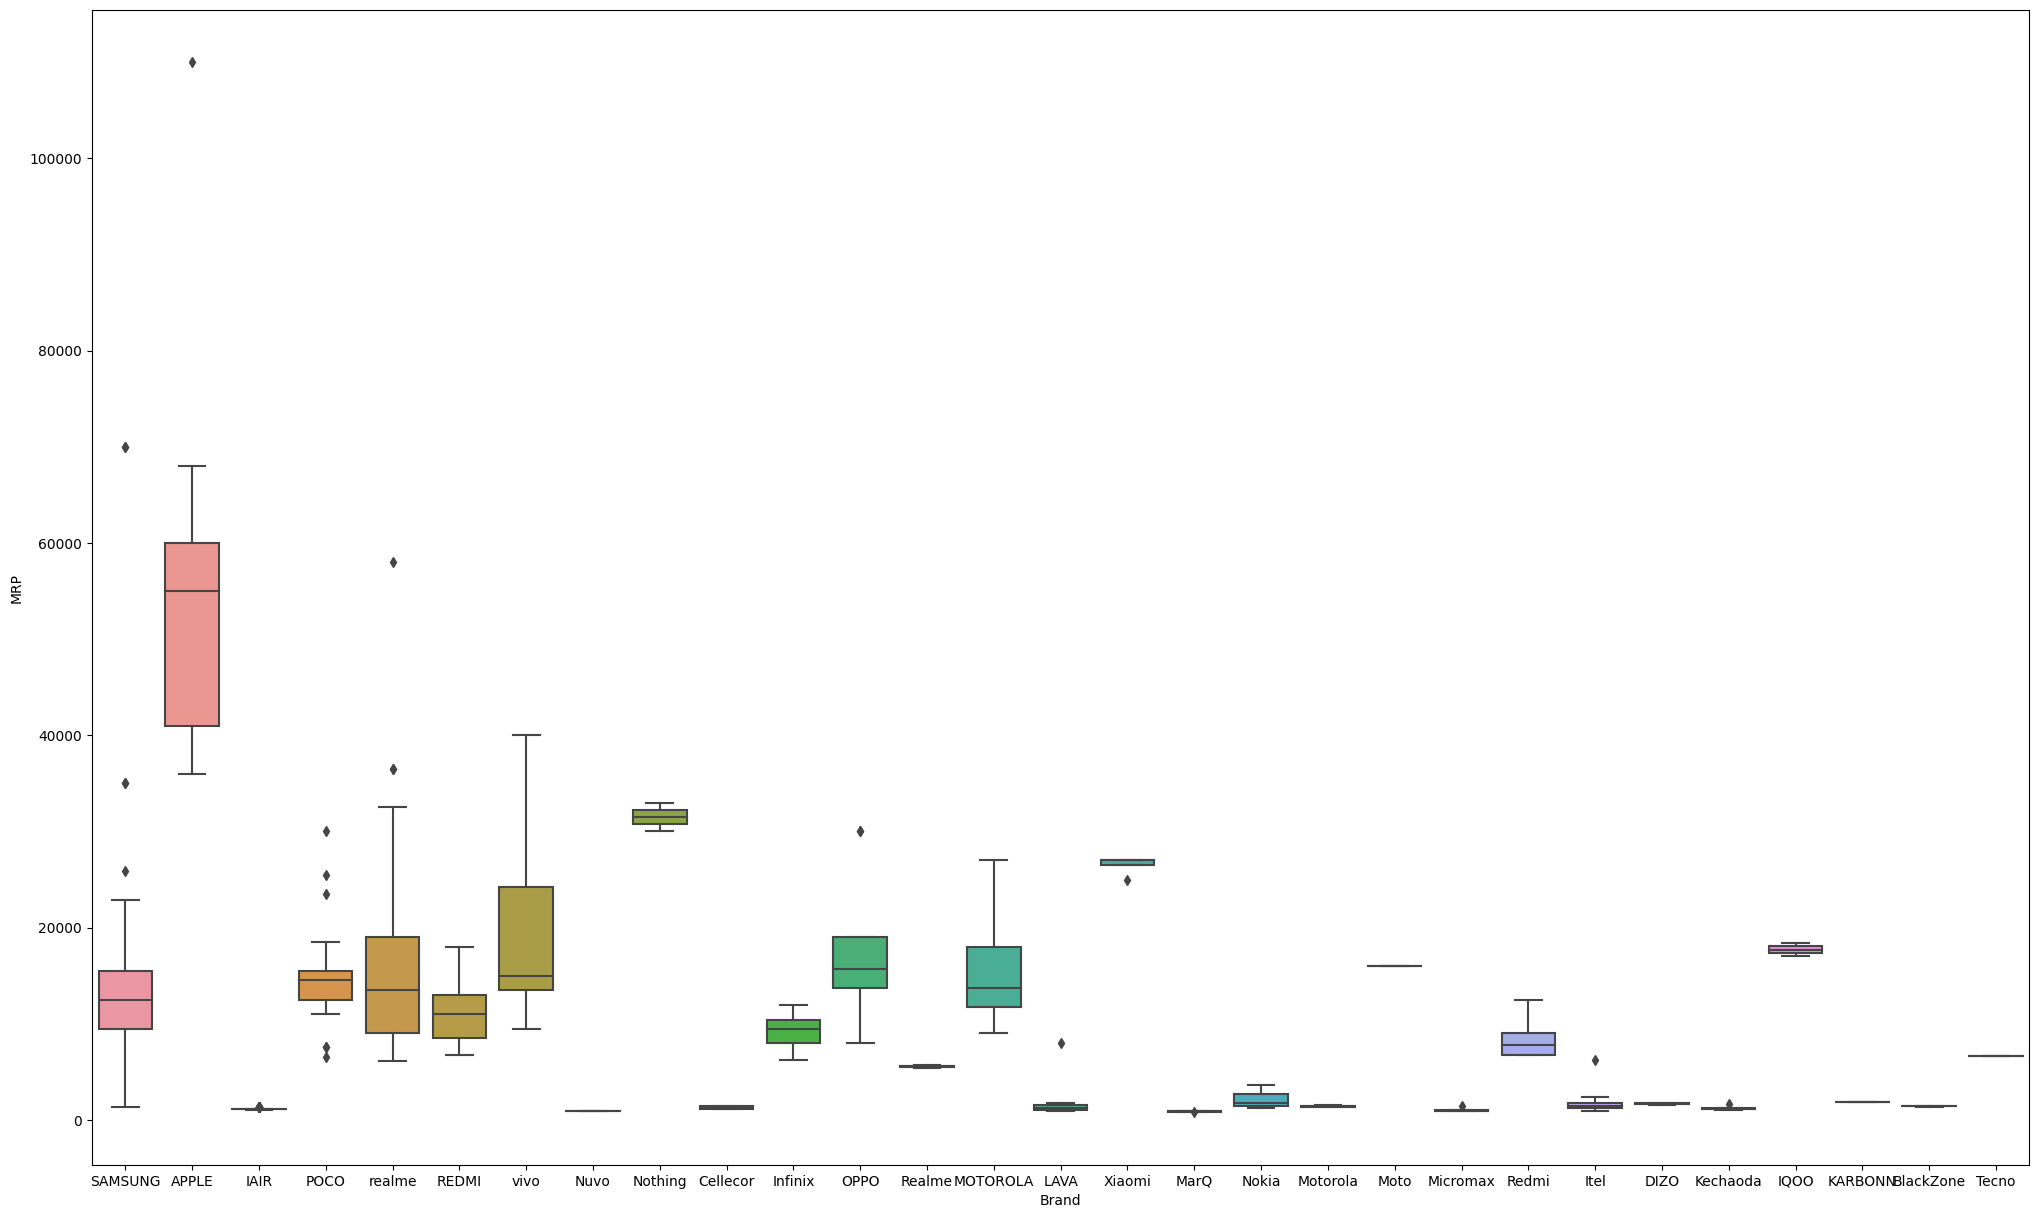

In [176]:
plt.figure(figsize=(25, 15))
sns.boxplot(x = df.Brand, y = df.MRP)

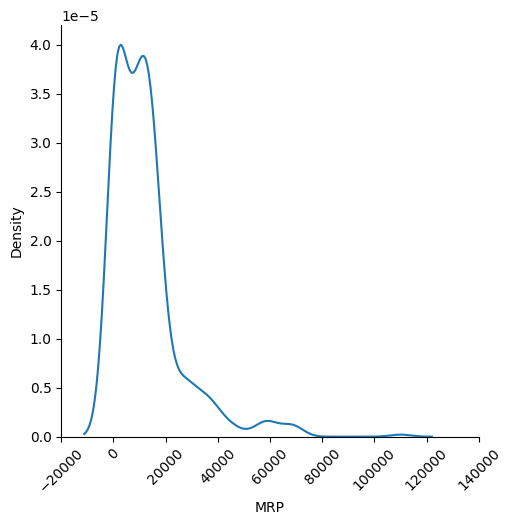

In [169]:
g = sns.displot(df.MRP, kind='kde')
g.set_xticklabels(rotation=45)

<AxesSubplot:xlabel='Brand', ylabel='count'>

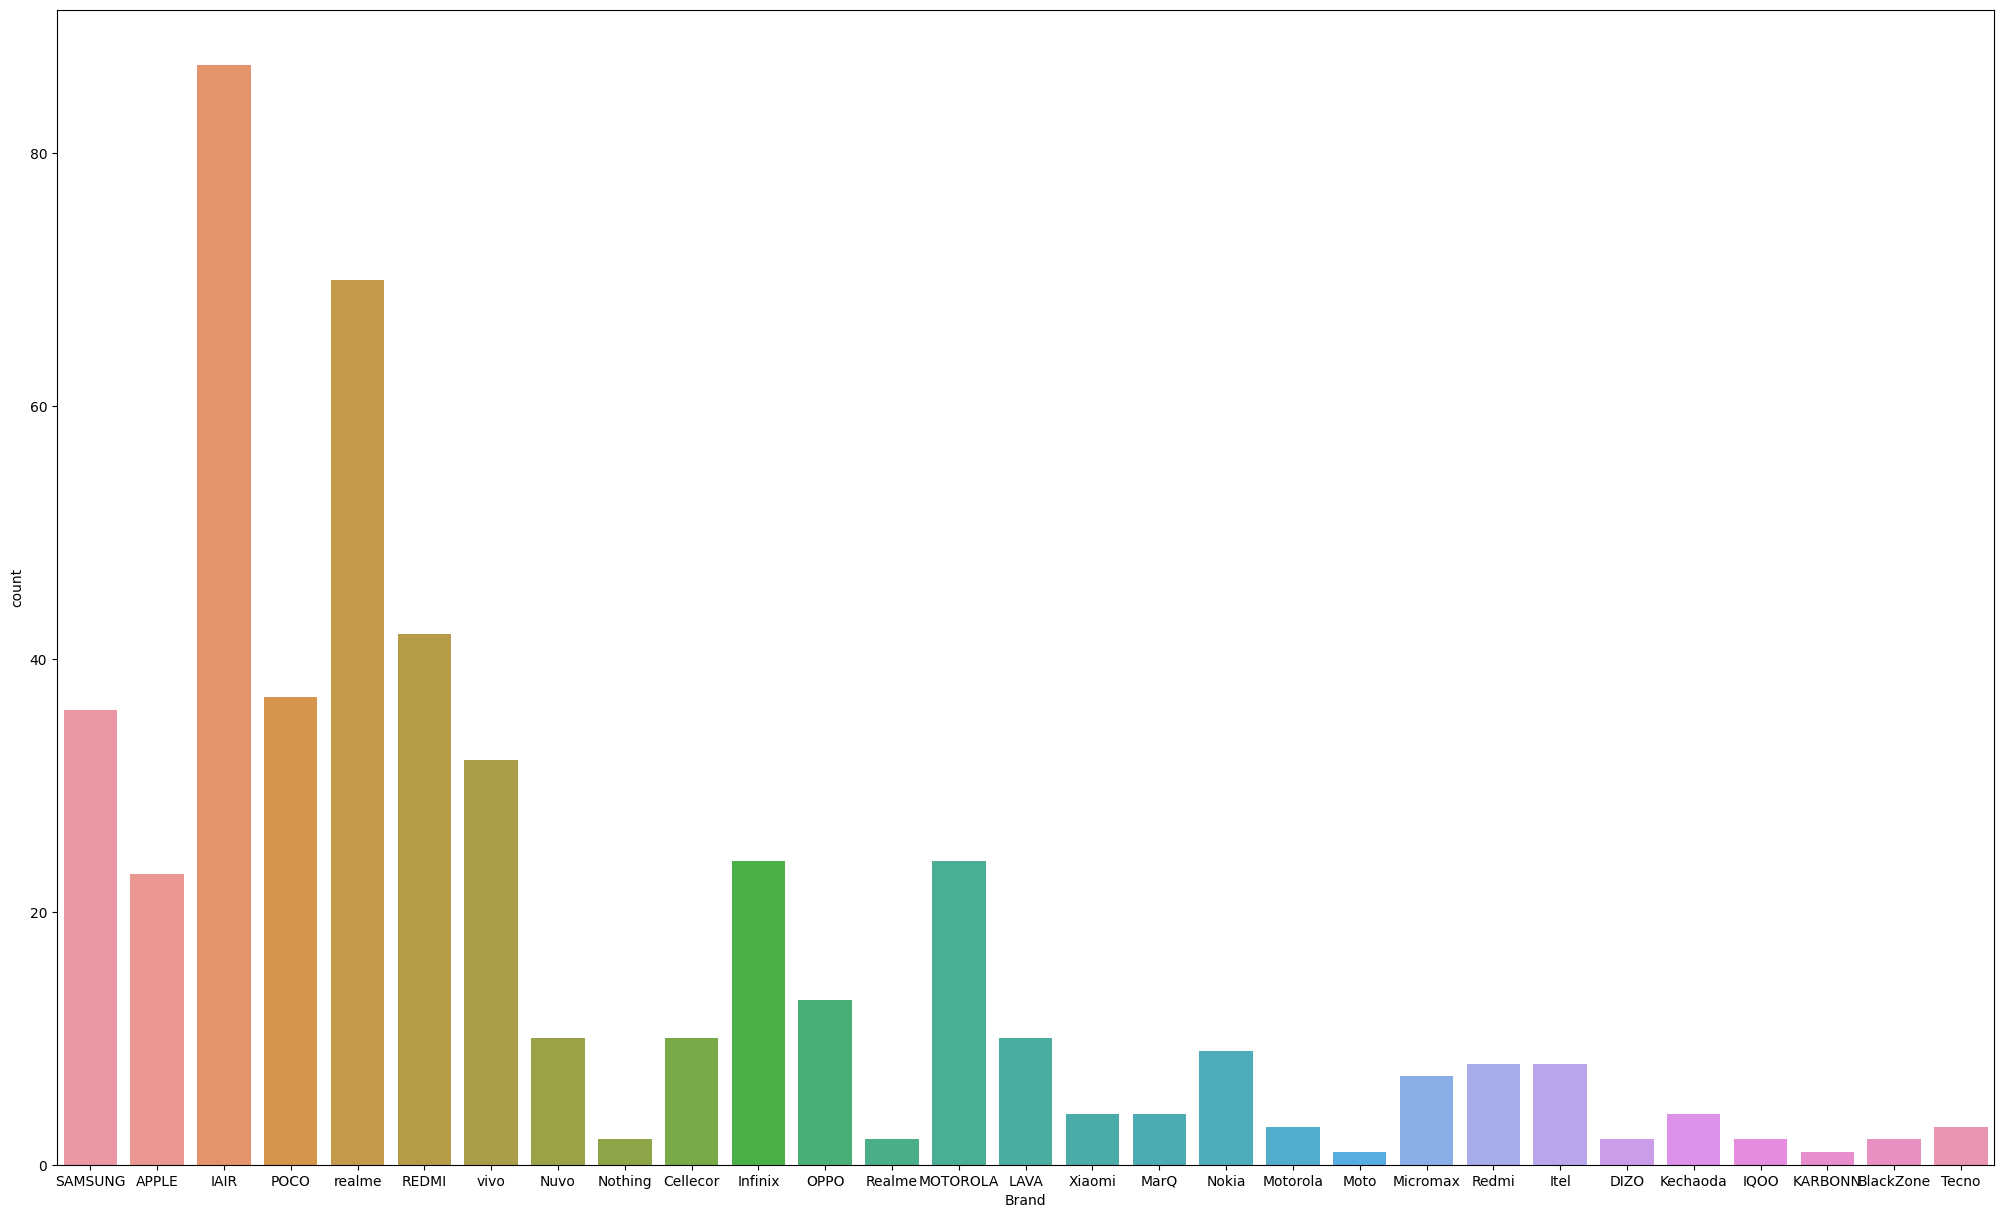

In [174]:
plt.figure(figsize=(25, 15))
sns.countplot(x=df.Brand)

Observation - The above plot show us the count for each product. We can see that IAIR is having highest number of product listing on Flipkart website

In [177]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                        
               min       max          mean
Brand                                     
APPLE      35990.0  109990.0  53816.086957
BlackZone   1380.0    1439.0   1409.500000
Cellecor    1179.0    1459.0   1319.000000
DIZO        1599.0    1799.0   1699.000000
IAIR        1072.0    1319.0   1134.712644
IQOO       16999.0   18399.0  17699.000000
Infinix     6199.0   11999.0   9224.000000
Itel         929.0    6190.0   2018.000000
KARBONN     1890.0    1890.0   1890.000000
Kechaoda    1074.0    1625.0   1249.250000
LAVA         900.0    7999.0   1923.200000
MOTOROLA    8999.0   26999.0  14884.416667
MarQ         799.0     899.0    874.000000
Micromax     915.0    1472.0   1024.142857
Moto       15999.0   15999.0  15999.000000
Motorola    1299.0    1579.0   1425.666667
Nokia       1199.0    3659.0   2092.666667
Nothing    29999.0   32999.0  31499.000000
Nuvo         899.0     899.0    899.000000
OPPO        7990.0   29999.0  16781.230769
POCO        6499.0   29999.0  14531.432432
REDMI       6699.0   17999.0  11380.857143
Realme      5360.0    5749.0   5554.500000
Redmi       6732.0   12520.0   8598.250000
SAMSUNG     1299.0   69999.0  15631.472222
Tecno       6675.0    6697.0   6685.000000
Xiaomi     24999.0   26999.0  26499.000000
realme      6110.0   57999.0  16403.985714
vivo        9499.0   39999.0  19045.593750

<AxesSubplot:xlabel='Brand'>

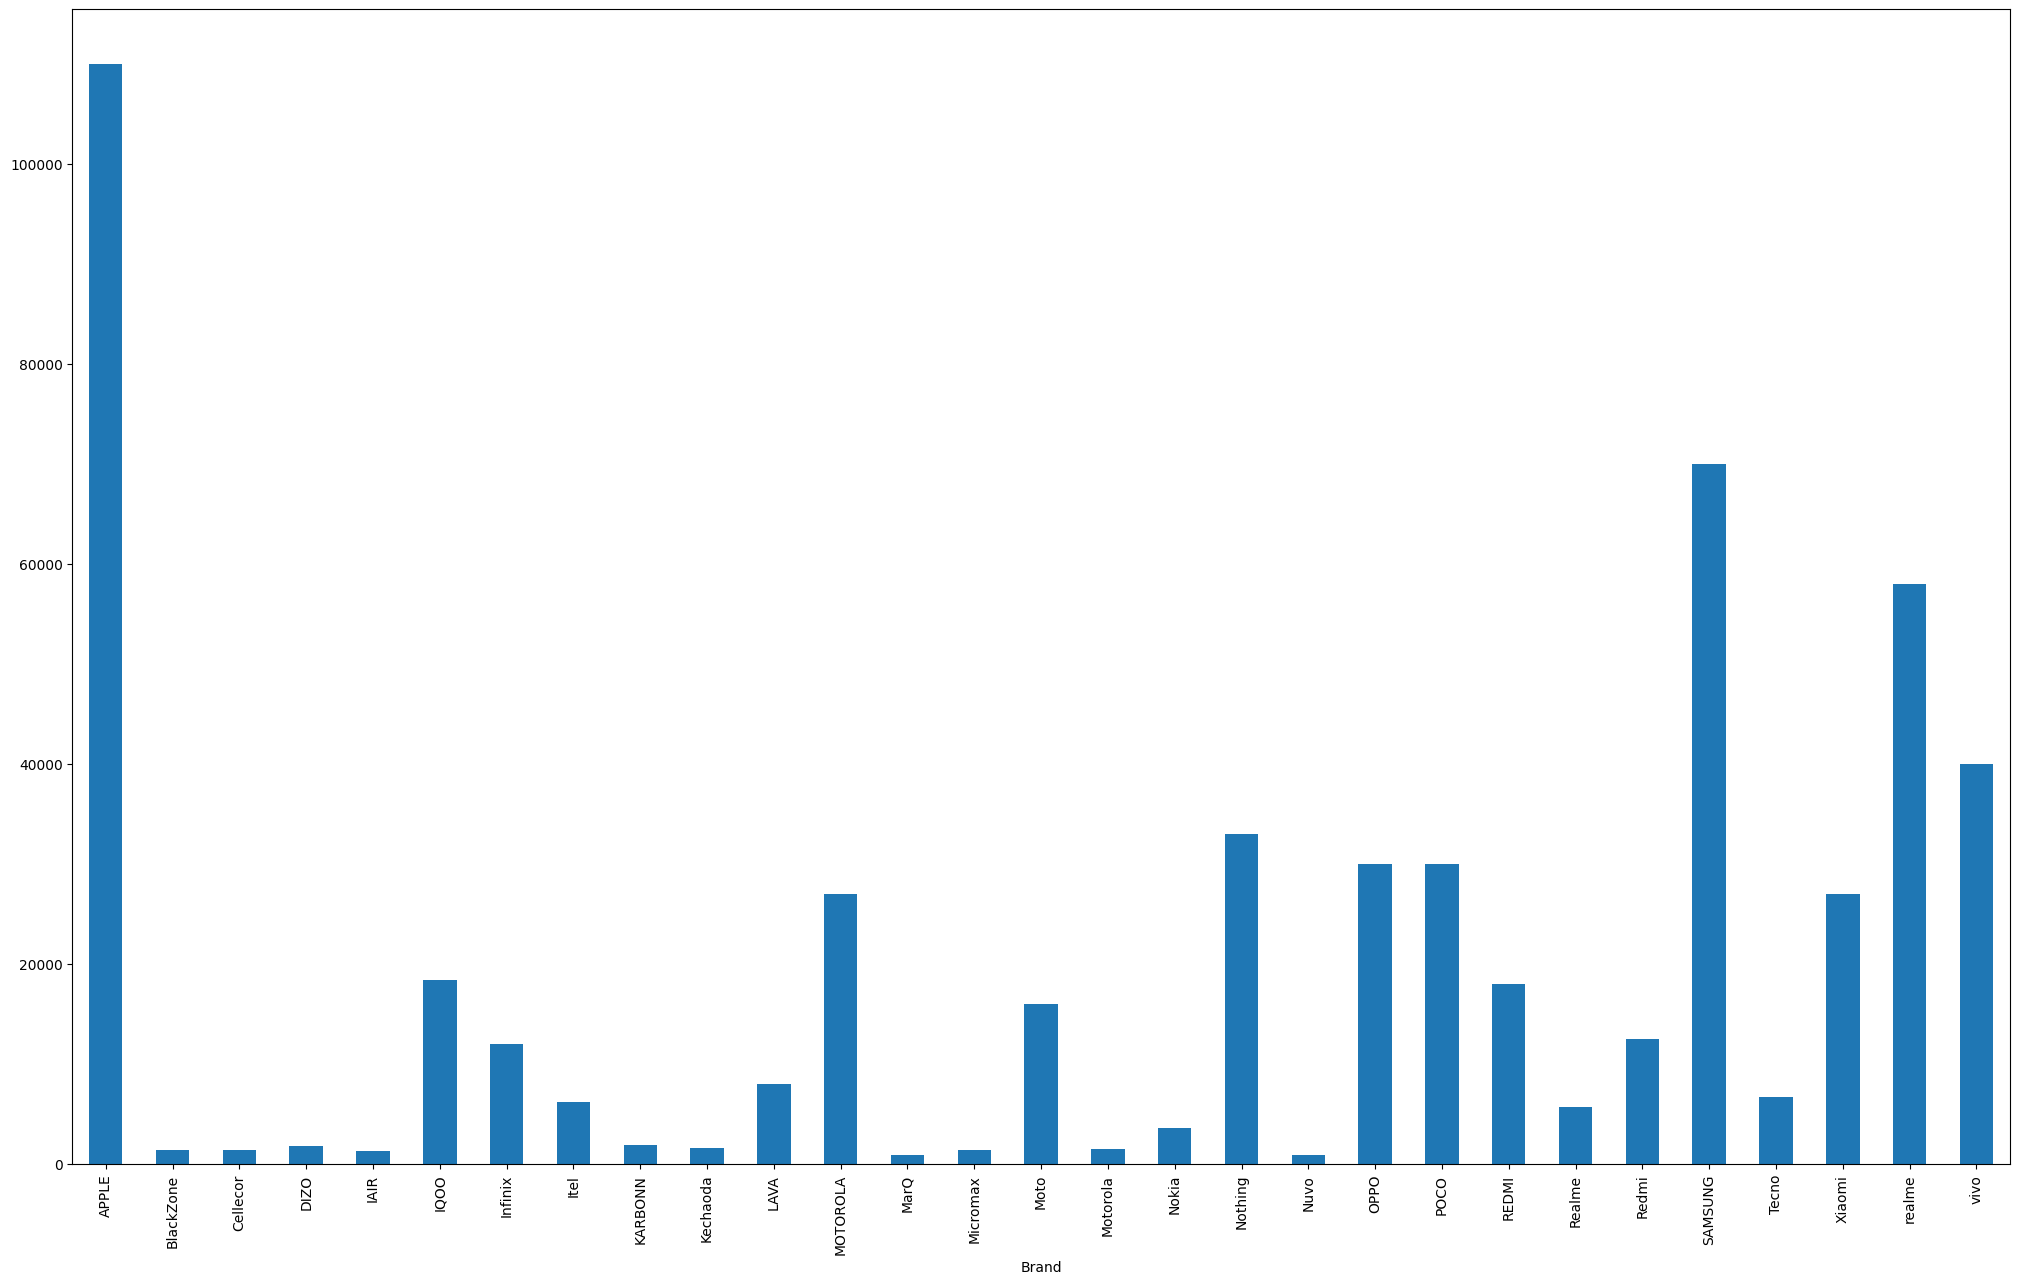

In [178]:
plt.figure(figsize=(25, 15))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

Observation: Apple has highest price among all the brands

<AxesSubplot:xlabel='Brand'>

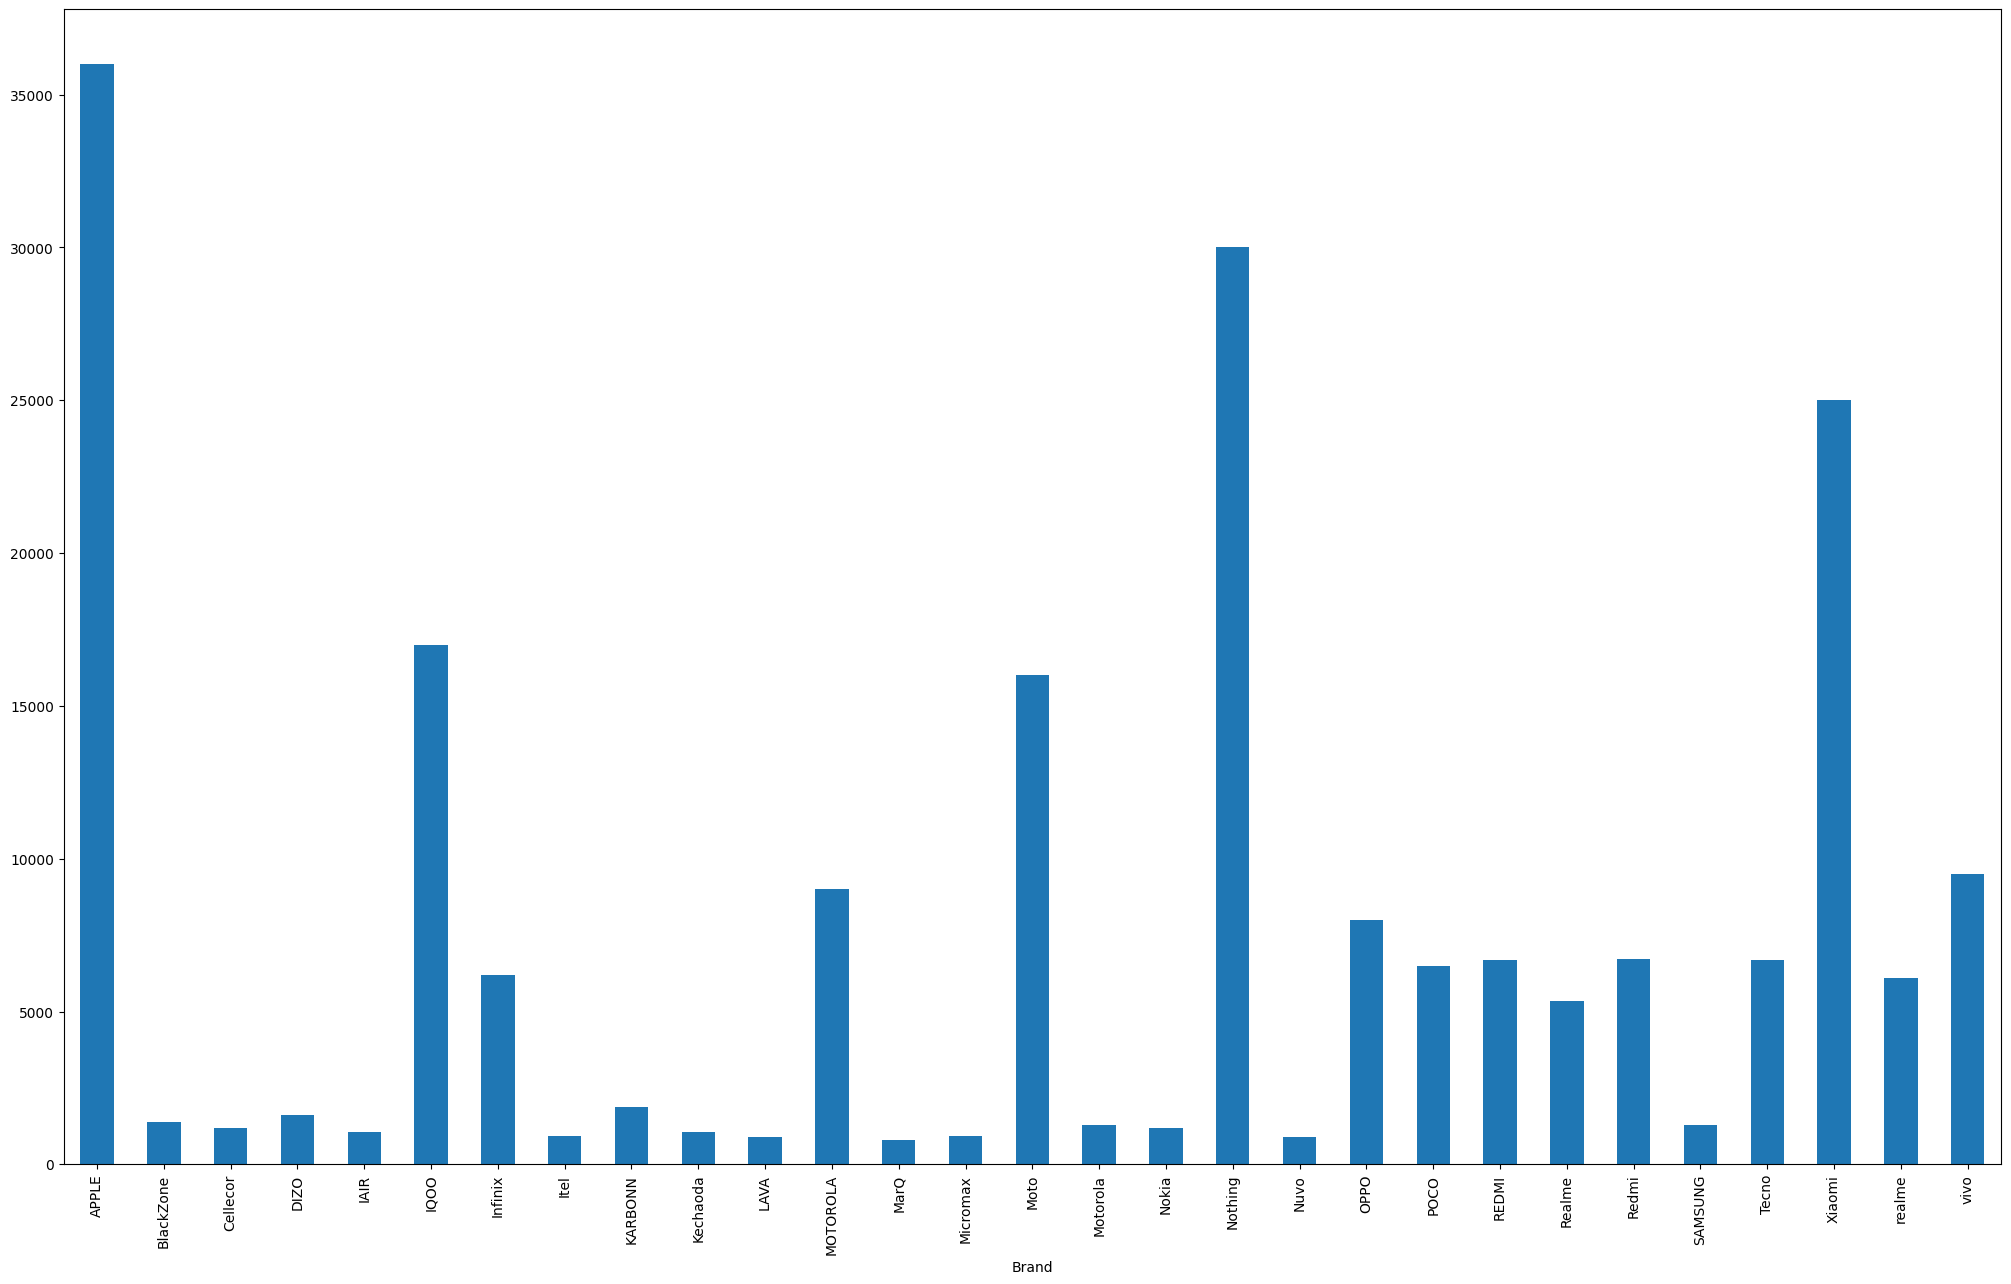

In [182]:
plt.figure(figsize=(25, 15))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')


In [183]:
df.groupby(['Brand'])['MRP'].min()

Brand
APPLE        35990.0
BlackZone     1380.0
Cellecor      1179.0
DIZO          1599.0
IAIR          1072.0
IQOO         16999.0
Infinix       6199.0
Itel           929.0
KARBONN       1890.0
Kechaoda      1074.0
LAVA           900.0
MOTOROLA      8999.0
MarQ           799.0
Micromax       915.0
Moto         15999.0
Motorola      1299.0
Nokia         1199.0
Nothing      29999.0
Nuvo           899.0
OPPO          7990.0
POCO          6499.0
REDMI         6699.0
Realme        5360.0
Redmi         6732.0
SAMSUNG       1299.0
Tecno         6675.0
Xiaomi       24999.0
realme        6110.0
vivo          9499.0
Name: MRP, dtype: float64

marq has minimum price